# Lesson 7

# Matrix Factorization for Recommendations

## Questions still opened

## How to know that our recommendation is a good one?

#### Training and Testing Data For Recommendations

**prior** to implement our recommendation $\rightarrow$ look for a metric of our interest

metric x time

#### In Udacity text:

"In the last lesson, you were making recommendations by providing a list of popular items, or a list of items that the user hadn't observed but that someone with similar tastes had observed. However, understanding if these recommendations are good in practice means that you have to deploy these recommendations to users and see how it impacts your metrics (sales, higher engagement, clicks, conversions, etc.).

You may not want your recommendations to go live to understand how well they work. In these cases, you will want to split your data into training and testing portions. In these cases, you can train your recommendation engine on a subset of the data, then you can test how well your recommendation engine performs on a test set of data before deploying your model to the world.

However, the cases you saw in the last lesson, where just a list of recommendations was provided, don't actually lend themselves very well to training and testing methods of evaluation. In the next upcoming pages, you will be introduced to matrix factorization, which actually does work quite well for these situations."

### Why to use SVD?

#### Singular Value Decomposition

Simon Funk $\rightarrow$ FunkSVD


#### In Udacity text:

"Singular Value Decomposition - If we let AA be our user-item matrix, we can write the decomposition of that matrix in the following way:"

$A = U \Sigma V^T$

Is a **Matrix Factorization** + **no** missing values (positive or negative)


$U$ $\rightarrow$ User ($n$) $\times$ Latent Factor ($k$) $\leftarrow$ how users are sensible to latent factors

$V^T$ $\rightarrow$ Latent Factor ($k$) $\times$ Movie ($m$) $\leftarrow$ how movies can provide some latent factors

$\Sigma$ is a $k \times k$ largest to smallest diagonal matrix $\leftarrow$ how much each latent factor weights to predict the rating (some were dropped down, as we restrict the size of $k$)

#### In Udacity text:

"In the next part of this lesson, you will first get exposure to Singular Value Decomposition, or SVD. We will soon see why this technique falls short for many recommendation problems. However, understanding traditional SVD approaches to matrix factorization is useful as a start to a number of matrix factorization techniques that are possible in practice.

In order to implement SVD for many recommendation engines, we will need to use a slightly modified approach known as FunkSVD. This approach proved to work incredibly well during the Netflix competition, and therefore, it is one of the most popular recommendation approaches in use today."


#### Latent Factors

is **not** a feature observed in your data (a movie is about robot-love, or kinky-sadism) $\rightarrow$ there is a trigger between user-movie

#### In Udacity text:

"When performing SVD, we create a matrix of users by items (or customers by movies in our specific example), with user ratings for each item scattered throughout the matrix. An example is shown in the image below.

![latent factors](graphs\latent.png)

You can see that this matrix doesn't have any specific information about the users or items. Rather, it just holds the ratings that each user gave to each item. Using SVD on this matrix, we can find latent features related to the movies and customers. This is amazing because the dataset doesn't contain any information about the customers or movies!"

---

## How to use Machine Learning to make recommendations?

split data in Train (**fit**) x Test (**evaluate**)

#### Validating Your Recommendations

old data $\rightarrow$ fit

new data $\rightarrow$ evaluate

**SVD** techniques can provide a **rating** for every user x item pair (you predicted an **8** and it was an **8**)

Metrics lie **MSE** (Mean Squared Error) or **MAE** (Mean Absolute Error)

#### Online Testing

#### In Udacity text:
"For online methods of testing a recommender's performance, many of the methods you saw in the previous lesson work very well - you can deploy your recommendations and just watch your metrics carefully. It is common in practice to set up online recommendations to have an "old" version of recommended items, which is compared to a new page that uses a new recommendation strategy.

All ideas associated with A/B testing that you learned in the earlier lessons are critical to watching your metrics in online learning, and ultimately, choosing a recommendation strategy that works best for your products and customers."

#### Offline Testing

#### In Udacity text:
"In many cases, a company might not let you simply deploy your recommendations out into the real world any time you feel like it. Testing out your recommendations in a training-testing environment prior to deploying them is called offline testing.

The recommendation methods you built in the previous lesson actually don't work very well for offline testing. In offline testing, it is ideal to not just obtain a list of recommendations for each individual, because we ultimately don't know if a user doesn't use an item because they don't like it, or because they just haven't used it yet (but would like it). Rather, it would be great if we have an idea of how much each user would like each item using a predicted rating. Then we can compare this predicted rating to the actual rating any individual gives to an item in the future.

In the previous video, you saw an example of a user to whom we gave a list of movies that they still hadn't seen. Therefore, we couldn't tell how well we were doing with our recommendations. Techniques related to matrix factorization lend themselves nicely to solving this problem."

#### User Groups

#### In Udacity text:
"The final (possible) method of validating your recommendations is by having user groups give feedback on items you would recommend for them. Obtaining good user groups that are representative of your customers can be a challenge on its own. This is especially true when you have a lot of products and a very large consumer base."

---

## How to make recommendations to individuals that are new in the platform?

the **Cold Start Problem**

---

## Intro to SVD 

## First Notebook - L10 - Singular Value Decomposition

### Singular Value Decomposition

So far in this lesson, you have gained some exposure to Singular Value Decomposition.  In this notebook, you will get some hands on practice with this technique.

Let's get started by reading in our libraries and setting up the data we will be using throughout this notebook

`1.` Run the cell below to create the **user_movie_subset** dataframe.  This will be the dataframe you will be using for the first part of this notebook.

**Note: Unstacking the matrix here could take ~10 mins to run.**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#from pathlib import Path
#patmy = Path('/content/gdrive/MyDrive/GoogleColab/DataScientistStudies3')

In [2]:
%ls /content/gdrive/MyDrive/GoogleColab/DataScientistStudies3

data/                    L7StudiesNotesb.ipynb           svd_tests.py
graphs/                  LICENSE                         tests.py
helper.py                original_notebooks/             udacourse3.py
L2L3StudiesNotese.ipynb  README.md
L5L6StudiesNotesm.ipynb  Recommendations_with_IBM.ipynb


In [41]:
!cp /content/gdrive/MyDrive/GoogleColab/DataScientistStudies3/svd_tests.py .
!cp /content/gdrive/MyDrive/GoogleColab/DataScientistStudies3/udacourse3.py .

In [42]:
#reloader for our functions library
from importlib import reload 
import udacourse3

udacourse3 = reload(udacourse3)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import svd_tests as t

from time import time
from scipy import sparse
import udacourse3

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


You need to reallocate the maximum pagination (at Advanced Options on Windows) to at least **16Gb** and restart your computer before running this!

In [5]:
%ls /content/gdrive/MyDrive/GoogleColab/DataScientistStudies3/data

all_recs.p              movies.dat            statistical_significance_data.csv
bootstrapping_data.csv  permutation_data.csv  train_data.csv
ExperimentalDesign.txt  ratings.dat           user_matrix
movie_matrix            reviews_clean.csv     validation_data.csv
movies_clean.csv        signtest_data.csv


In [6]:
!cp /content/gdrive/MyDrive/GoogleColab/DataScientistStudies3/data/movies_clean.csv .
!cp /content/gdrive/MyDrive/GoogleColab/DataScientistStudies3/data/reviews_clean.csv .

In [9]:
# Read in the datasets
movie = udacourse3.fn_read_data('movies_clean.csv', remove_noisy_cols=True)
review = udacourse3.fn_read_data('reviews_clean.csv', remove_noisy_cols=True)

---
## For specific notebook

In [ ]:
# Create user-by-item matrix
begin=time()

user_item = review[['user_id', 'movie_id', 'rating']]
user_by_movie = user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()

user_movie_subset = user_by_movie[[73486, 75314, 68646, 99685]].dropna(axis=0)

end=time()
print('time spent:', end-begin)
user_movie_subset.head(2)

time spent: -10.658522605895996


movie_id,73486,75314,68646,99685
user_id,,,,
265,10.0,10.0,10.0,10.0
1023,10.0,4.0,9.0,10.0


`2.` Now that you have the **user_movie_subset** matrix, use this matrix to correctly match each key to the correct value in the dictionary below.  Use the cells below the dictionary as necessary.

In [ ]:
# match each letter to the best statement in the dictionary below - each will be used at most once
a = 20
b = 68646
c = 'The Godfather'
d = 'Goodfellas'
e = 265
f = 30685
g = 4

sol_1_dict = {
    'the number of users in the user_movie_subset': a,
    'the number of movies in the user_movie_subset': g,
    'the user_id with the highest average ratings given': e,
    'the movie_id with the highest average ratings received': b,
    'the name of the movie that received the highest average rating': c
}

#test dictionary here
t.test1(sol_1_dict)

That's right!  There are 20 users in the dataset, which is given by the number of rows. There are 4 movies in the dataset given by the number of columns.  You can find the movies or users with the highest average ratings by taking the mean of each row or column.  Using the movies table, you can find the movie names associated with each id.  This shows the top rated movie is The Godfather!


In [ ]:
# Cell for work
# user with the highest average rating
print(user_movie_subset.mean(axis=1))

# movie with highest average rating
print(user_movie_subset.mean(axis=0))

# list of movie names
for movie_id in [73486, 75314,  68646, 99685]:
    print(movie[movie['movie_id'] == movie_id]['movie'])
    
# users by movies
user_movie_subset.shape

user_id
265      10.00
1023      8.25
1683      8.00
6571      9.25
11639     8.25
13006     6.50
14076     9.00
14725     8.00
23548     8.25
24760     7.50
28713     8.75
30685     9.50
34110     9.25
34430     6.50
35150     9.50
43294     9.50
46849     8.25
50556     7.25
51382     7.75
51410     8.00
dtype: float64
movie_id
73486    8.60
75314    7.35
68646    9.00
99685    8.50
dtype: float64
4187    One Flew Over the Cuckoo's Nest (1975)
Name: movie, dtype: object
4361    Taxi Driver (1976)
Name: movie, dtype: object
3706    The Godfather (1972)
Name: movie, dtype: object
6917    Goodfellas (1990)
Name: movie, dtype: object


(20, 4)

ow that you have a little more context about the matrix we will be performing Singular Value Decomposition on, we're going to do just that.  To get started, let's remind ourselves about the dimensions of each of the matrices we are going to get back.   Essentially, we are going to split the **user_movie_subset** matrix into three matrices:

$$ U \Sigma V^T $$


`3.` Given what you learned about in the previous parts of this lesson, provide the dimensions for each of the matrices specified above using the dictionary below.

In [ ]:
# match each letter in the dictionary below - a letter may appear more than once.
a = 'a number that you can choose as the number of latent features to keep'
b = 'the number of users'
c = 'the number of movies'
d = 'the sum of the number of users and movies'
e = 'the product of the number of users and movies'

sol_2_dict = {
    'the number of rows in the U matrix': b, 
    'the number of columns in the U matrix': a, 
    'the number of rows in the V transpose matrix': a, 
    'the number of columns in the V transpose matrix': c
}

#test dictionary here
t.test2(sol_2_dict)

That's right!  We will now put this to use, so you can see how the dot product of these matrices come together to create our user item matrix.  The number of latent features will control the sigma matrix as well, and this will a square matrix that will at most be the minimum of the number of users and number of movies (in our case the minimum is the 4 movies).


Now let's verify the above dimensions by performing SVD on our user-movie matrix.

`4.` Below you can find the code used to perform SVD in numpy.  You can see more about this functionality in the [documentation here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html).  What do you notice about the shapes of your matrices?  If you try to take the dot product of the three objects you get back, can you directly do this to get back the user-movie matrix?

In [ ]:
u, s, vt = np.linalg.svd(user_movie_subset)
s.shape, u.shape, vt.shape

((4,), (20, 20), (4, 4))

In [ ]:
# Run this cell for our thoughts on the questions posted above
t.question4thoughts()

Looking at the dimensions of the three returned objects, we can see the following:

 1. The u matrix is a square matrix with the number of rows and columns equaling the number of users. 

 2. The v transpose matrix is also a square matrix with the number of rows and columns equaling the number of items.

 3. The sigma matrix is actually returned as just an array with 4 values, but should be a diagonal matrix.  Numpy has a diag method to help with this.  

 In order to set up the matrices in a way that they can be multiplied together, we have a few steps to perform: 

 1. Turn sigma into a square matrix with the number of latent features we would like to keep. 

 2. Change the columns of u and the rows of v transpose to match this number of dimensions. 

 If we would like to exactly re-create the user-movie matrix, we could choose to keep all of the latent features.


`5.` Use the thoughts from the above question to create u, s, and vt with four latent features.  When you have all three matrices created correctly, run the test below to show that the dot product of the three matrices creates the original user-movie matrix.  The matrices should have the following dimensions:

$$ U_{n x k} $$

$$\Sigma_{k x k} $$

$$V^T_{k x m} $$

where:

1. n is the number of users
2. k is the number of latent features to keep (4 for this case)
3. m is the number of movies

In [ ]:
# Change the dimensions of u, s, and vt as necessary to use four latent features
# update the shape of u and store in u_new
u_new = u[:, :len(s)]

# update the shape of s and store in s_new
s_new = np.zeros((len(s), len(s)))
s_new[:len(s), :len(s)] = np.diag(s) 

# Because we are using 4 latent features and there are only 4 movies, 
# vt and vt_new are the same
vt_new = vt

In [ ]:
# Check your matrices against the solution
assert u_new.shape == (20, 4),\
"Oops!  The shape of the u matrix doesn't look right. It should be 20 by 4."
assert s_new.shape == (4, 4),\
"Oops!  The shape of the sigma matrix doesn't look right.  It should be 4 x 4."
assert vt_new.shape == (4, 4),\
"Oops! The shape of the v transpose matrix doesn't look right.  It should be 4 x 4."
assert np.allclose(np.dot(np.dot(u_new, s_new), vt_new), user_movie_subset),\
"Oops!  Something went wrong with the dot product.  Your result didn't reproduce the original movie_user matrix."
print("That's right! The dimensions of u should be 20 x 4, and both v transpose and sigma should be 4 x 4")
print("The dot product of the three matrices how equals the original user-movie matrix!")

That's right! The dimensions of u should be 20 x 4, and both v transpose and sigma should be 4 x 4
The dot product of the three matrices how equals the original user-movie matrix!


It turns out that the sigma matrix can actually tell us how much of the original variability in the user-movie matrix is captured by each latent feature.  The total amount of variability to be explained is the sum of the squared diagonal elements.  The amount of variability explained by the first componenet is the square of the first value in the diagonal.  The amount of variability explained by the second componenet is the square of the second value in the diagonal.   

`6.` Using the above information, can you determine the amount of variability in the original user-movie matrix that can be explained by only using the first two components? Use the cell below for your work, and then test your answer against the solution with the following cell.

In [ ]:
total_var = np.sum(s**2)
var_exp_comp1_and_comp2 = s[0]**2 + s[1]**2
perc_exp = round(var_exp_comp1_and_comp2/total_var*100, 2)
print("The total variance in the original matrix is {}.".format(total_var))
print("Ther percentage of variability captured by the first two components is {}%.".format(perc_exp))

The total variance in the original matrix is 5877.0.
Ther percentage of variability captured by the first two components is 98.55%.


In [ ]:
assert np.round(perc_exp, 2) == 98.55,\
"Oops!  That doesn't look quite right.You should have total variability as the sum of all the squared elements in the sigma matrix.  Then just the sum of the squared first two elements is the amount explained by the first two latent features.  Try again."
print("Yup!  That all looks good!")

Yup!  That all looks good!


`7.` Similar to in the previous question, change the shapes of your u, sigma, and v transpose matrices.  However, this time consider only using the first 2 components to reproduce the user-movie matrix instead of all 4. After you have your matrices set up, check your matrices against the solution by running the tests.  The matrices should have the following dimensions:

$$ U_{n x k} $$

$$\Sigma_{k x k} $$

$$V^T_{k x m} $$

where:

1. n is the number of users
2. k is the number of latent features to keep (2 for this case)
3. m is the number of movies

In [ ]:
# Change the dimensions of u, s, and vt as necessary to use four latent features
# update the shape of u and store in u_new
k = 2
u_2 = u[:, :k]

# update the shape of s and store in s_new
s_2 = np.zeros((k, k))
s_2[:k, :k] = np.diag(s[:k]) 

# Because we are using 2 latent features, we need to update vt this time
vt_2 = vt[:k, :]

In [ ]:
# Check that your matrices are the correct shapes
assert u_2.shape == (20, 2),\
"Oops!  The shape of the u matrix doesn't look right. It should be 20 by 2."
assert s_2.shape == (2, 2),\
"Oops!  The shape of the sigma matrix doesn't look right.  It should be 2 x 2."
assert vt_2.shape == (2, 4),\
"Oops! The shape of the v transpose matrix doesn't look right.  It should be 2 x 4."
print("That's right! The dimensions of u should be 20 x 2, sigma should be 2 x 2, and v transpose should be 2 x 4")
print("The question is now that we don't have all of the latent features, how well can we really re-create")
print("the original user-movie matrix?")

That's right! The dimensions of u should be 20 x 2, sigma should be 2 x 2, and v transpose should be 2 x 4
The question is now that we don't have all of the latent features, how well can we really re-create
the original user-movie matrix?


`8.` When using all 4 latent features, we saw that we could exactly reproduce the user-movie matrix.  Now that we only have 2 latent features, we might measure how well we are able to reproduce the original matrix by looking at the sum of squared errors from each rating produced by taking the dot product as compared to the actual rating.  Find the sum of squared error based on only the two latent features, and use the following cell to test against the solution. 

In [ ]:
# Compute the dot product
pred_ratings = np.dot(np.dot(u_2, s_2), vt_2)

# Compute the squared error for each predicted vs. actual rating
sum_square_errs = np.sum(np.sum((user_movie_subset - pred_ratings)**2))

In [ ]:
# Check against the solution
assert np.round(sum_square_errs, 2) == 85.34, "Oops!  That doesn't look quite right.  You should return a single number for the whole matrix."
print("That looks right!  Nice job!")

That looks right!  Nice job!


At this point, you may be thinking... why would we want to choose a k that doesn't just give us back the full user-movie matrix with all the original ratings.  This is a good question.  One reason might be for computational reasons - sure, you may want to reduce the dimensionality of the data you are keeping, but really this isn't the main reason we would want to perform reduce k to lesser than the minimum of the number of movies or users.

Let's take a step back for a second.  In this example we just went through, your matrix was very clean.  That is, for every user-movie combination, we had a rating.  **There were no missing values.** But what we know from the previous lesson is that the user-movie matrix is full of missing values.  

A matrix similar to the one we just performed SVD on:

<img src="graphs/nice_ex.png" width="400" height="400">

The real world:

<img src="graphs/real_ex.png" width="400" height="400">


Therefore, if we keep all k latent features it is likely that latent features with smaller values in the sigma matrix will explain variability that is probably due to noise and not signal. Furthermore, if we use these "noisey" latent features to assist in re-constructing the original user-movie matrix it will potentially (and likely) lead to worse ratings than if we only have latent features associated with signal.   

`9.` Let's try introducing just a little of the real world into this example by performing SVD on a matrix with missing values.  Below I have added a new user to our matrix who hasn't rated all four of our movies.  Try performing SVD on the new matrix.  What happens?

A message will appear as:
    
`LinAlgError: SVD did not converge` 

In [ ]:
# This line adds one nan value as the very first entry in our matrix
user_movie_subset.iloc[0, 0] = np.nan

# Try svd with this new matrix
u, s, vt = np.linalg.svd(user_movie_subset)

NameError: ignored

**Even with just one nan value we cannot perform SVD!  This is going to be a huge problem, because our real dataset has nan values everywhere!  This is where FunkSVD comes in to help.** 

---

## Intro to SVD 

## Second Notebook - L15 - Implementing FunkSVD

#### Udacity notes:

"In this notebook we will take a look at writing our own function that performs FunkSVD, which will follow the steps you saw in the previous video.  If you find that you aren't ready to tackle this task on your own, feel free to skip to the following video where you can watch as I walk through the steps."

To test our algorithm, we will run it on the subset of the data you worked with earlier.  Run the cell below to get started.

In [7]:
begin=time()
#Read in the datasets
movie = udacourse3.fn_read_data('movies_clean.csv', remove_noisy_cols=True)
review = udacourse3.fn_read_data('reviews_clean.csv', remove_noisy_cols=True)

# Create user-by-item matrix
user_items = review[['user_id', 'movie_id', 'rating', 'timestamp']]
user_by_movie = user_items.groupby(['user_id', 'movie_id'])['rating'].max().unstack()

# Create data subset
user_movie_subset = user_by_movie[[73486, 75314,  68646, 99685]].dropna(axis=0)
rating_mat = np.matrix(user_movie_subset)
end=time()
print('time spent:', end-begin)
rating_mat

time spent: 7.243285894393921


matrix([[10., 10., 10., 10.],
        [10.,  4.,  9., 10.],
        [ 8.,  9., 10.,  5.],
        [ 9.,  8., 10., 10.],
        [10.,  5.,  9.,  9.],
        [ 6.,  4., 10.,  6.],
        [ 9.,  8., 10.,  9.],
        [10.,  5.,  9.,  8.],
        [ 7.,  8., 10.,  8.],
        [ 9.,  5.,  9.,  7.],
        [ 9.,  8., 10.,  8.],
        [ 9., 10., 10.,  9.],
        [10.,  9., 10.,  8.],
        [ 5.,  8.,  5.,  8.],
        [10.,  8., 10., 10.],
        [ 9.,  9., 10., 10.],
        [ 9.,  8.,  8.,  8.],
        [10.,  8.,  1., 10.],
        [ 5.,  6., 10., 10.],
        [ 8.,  7., 10.,  7.]])

`1.` You will use the **user_movie_subset** matrix to show that your FunkSVD algorithm will converge.  In the below cell, use the comments and document string to assist you as you complete writing your own function to complete FunkSVD.  You may also want to try to complete the funtion on your own without the assistance of comments.  You may feel free to remove and add to the function in any way that gets you a working solution! 

**Notice:** There isn't a sigma matrix in this version of matrix factorization.

function `fn_FunkSVD` created!

`2.` Try out your function on the **user_movie_subset** dataset.  First try 4 latent features, a learning rate of 0.005, and 10 iterations.  When you take the dot product of the resulting U and V matrices, how does the resulting **user_movie** matrix compare to the original subset of the data?

In [30]:
user_mat, movie_mat = udacourse3.fn_FunkSVD(
                        rating_mat=rating_mat, 
                        latent_feature=4, 
                        learning_rate=0.005, 
                        num_iter=10,
                        verbose=True)

###function FunkSDV started
number of users: 20
number of movies: 4
number of valid ratings: 79
Optimizaiton Statistics
Iteration Mean Squared Error
  1       47.0336
  2       17.4815
  3       4.7291
  4       2.9644
  5       2.7946
  6       2.7565
  7       2.7358
  8       2.7169
  9       2.6965
 10       2.6734
elapsed time: 0.0255s (00:00:0.0255s)


In [10]:
print(np.dot(user_mat, movie_mat))
print(rating_mat)

[[10.0479878   8.87246196 10.51732358 10.24397654]
 [ 8.68183717  7.20811603  8.87570913  9.08982966]
 [ 7.77219217  7.05385187  8.37242259  7.6440144 ]
 [ 9.7356348   8.16457729  9.81244213  9.75149872]
 [ 8.76186393  7.3328852   8.87044476  8.56329042]
 [ 6.79822539  6.04766005  7.28043482  6.80179909]
 [ 9.42381555  8.02439959  9.57946788  9.17939085]
 [ 8.30759651  7.24556641  8.68488894  8.0376918 ]
 [ 8.47763219  7.76453366  9.09194749  8.14287574]
 [ 7.77321148  6.75411772  8.03316793  7.61884992]
 [ 9.02212402  8.1016081   9.42371448  8.496327  ]
 [ 9.81172459  8.52194624 10.06310113  9.35853524]
 [ 9.01085556  8.34387918  9.89038147  9.09683842]
 [ 6.59833477  6.10551032  7.13312072  6.31222798]
 [ 9.7161677   8.59577647 10.16193844  9.75859022]
 [ 9.621073    8.12340597 10.01267351 10.2129507 ]
 [ 8.10032893  7.11842416  8.61735771  8.53973922]
 [ 7.25331981  5.84897872  7.23119329  7.41332491]
 [ 8.30740382  7.24432175  8.76667183  8.51245611]
 [ 8.07650583  7.17981551  8.57

**The predicted ratings from the dot product are already starting to look a lot like the original data values even after only 10 iterations.  You can see some extreme low values that are not captured well yet.  The 5 in the second to last row in the first column is predicted as an 8, and the 4 in the second row and second column is predicted to be a 7.  Clearly the model is not done learning, but things are looking good.**

`3.` Let's try out the function again on the **user_movie_subset** dataset.  This time we will again use 4 latent features and a learning rate of 0.005.  However, let's bump up the number of iterations to 250.  When you take the dot product of the resulting U and V matrices, how does the resulting **user_movie** matrix compare to the original subset of the data?  What do you notice about your error at the end of the 250 iterations?

In [31]:
user_mat, movie_mat = udacourse3.fn_FunkSVD(
                        rating_mat=rating_mat, 
                        latent_feature=4, 
                        learning_rate=0.005, 
                        num_iter=250,
                        verbose=True)

###function FunkSDV started
number of users: 20
number of movies: 4
number of valid ratings: 79
Optimizaiton Statistics
Iteration Mean Squared Error
  1       40.3210
  2       13.0213
  3       3.9047
  4       2.8719
  5       2.7253
  6       2.6681
  7       2.6281
  8       2.5894
  9       2.5477
 10       2.5011
 11       2.4485
 12       2.3891
 13       2.3222
 14       2.2471
 15       2.1635
 16       2.0713
 17       1.9710
 18       1.8632
 19       1.7495
 20       1.6315
 21       1.5115
 22       1.3920
 23       1.2755
 24       1.1643
 25       1.0600
 26       0.9640
 27       0.8767
 28       0.7982
 29       0.7279
 30       0.6651
 31       0.6089
 32       0.5584
 33       0.5125
 34       0.4706
 35       0.4320
 36       0.3961
 37       0.3626
 38       0.3312
 39       0.3017
 40       0.2739
 41       0.2478
 42       0.2233
 43       0.2004
 44       0.1792
 45       0.1595
 46       0.1414
 47       0.1249
 48       0.1099
 49       0.0963
 50       0.0842

In [12]:
print(np.dot(user_mat, movie_mat))
print(rating_mat)

[[10.00000029 10.00000014 10.00000008  9.9999997 ]
 [ 9.9999991   3.99999936  8.99999968 10.00000112]
 [ 7.99999976  8.99999987  9.99999995  5.00000026]
 [ 8.99999863  7.99999916  9.99999959 10.0000016 ]
 [10.00000102  5.00000079  9.0000004   8.99999871]
 [ 5.99999828  3.99999876  9.99999942  6.00000216]
 [ 8.9999994   7.99999978  9.99999991  9.0000006 ]
 [10.00000115  5.00000084  9.00000043  7.9999986 ]
 [ 7.00000147  8.00000107 10.00000054  7.99999818]
 [ 9.00000162  5.00000101  9.0000005   6.99999811]
 [ 9.00000205  8.00000146 10.00000069  7.99999743]
 [ 9.00000041 10.00000036 10.00000012  8.99999937]
 [10.0000002   8.99999998  9.99999996  7.99999983]
 [ 5.00000148  8.00000094  5.00000044  7.99999823]
 [ 9.99999903  7.99999933  9.99999961 10.00000111]
 [ 8.99999784  8.9999984   9.9999992  10.00000268]
 [ 8.99999862  7.99999905  7.99999953  8.00000167]
 [ 9.99999997  7.99999998  1.         10.00000004]
 [ 5.00000082  6.00000056 10.00000029  9.99999902]
 [ 7.99999985  6.99999986  9.99

**In this case, we were able to completely reconstruct the item-movie matrix to obtain an essentially 0 mean squared error. I obtained 0 MSE on iteration 165.**

The last time we placed an **np.nan** value into this matrix the entire svd algorithm in python broke.  Let's see if that is still the case using your FunkSVD function.  In the below cell, I have placed a nan into the first cell of your numpy array.  

`4.` Use 4 latent features, a learning rate of 0.005, and 250 iterations.  Are you able to run your SVD without it breaking (something that was not true about the python built in)?  Do you get a prediction for the nan value?  What is your prediction for the missing value? Use the cells below to answer these questions.

In [13]:
rating_mat[0, 0] = np.nan
rating_mat

matrix([[nan, 10., 10., 10.],
        [10.,  4.,  9., 10.],
        [ 8.,  9., 10.,  5.],
        [ 9.,  8., 10., 10.],
        [10.,  5.,  9.,  9.],
        [ 6.,  4., 10.,  6.],
        [ 9.,  8., 10.,  9.],
        [10.,  5.,  9.,  8.],
        [ 7.,  8., 10.,  8.],
        [ 9.,  5.,  9.,  7.],
        [ 9.,  8., 10.,  8.],
        [ 9., 10., 10.,  9.],
        [10.,  9., 10.,  8.],
        [ 5.,  8.,  5.,  8.],
        [10.,  8., 10., 10.],
        [ 9.,  9., 10., 10.],
        [ 9.,  8.,  8.,  8.],
        [10.,  8.,  1., 10.],
        [ 5.,  6., 10., 10.],
        [ 8.,  7., 10.,  7.]])

In [32]:
# run SVD on the matrix with the missing value
user_mat, movie_mat = udacourse3.fn_FunkSVD(
                        rating_mat=rating_mat, 
                        latent_feature=4, 
                        learning_rate=0.005, 
                        num_iter=250,
                        verbose=True)

###function FunkSDV started
number of users: 20
number of movies: 4
number of valid ratings: 79
Optimizaiton Statistics
Iteration Mean Squared Error
  1       46.4930
  2       17.5340
  3       4.7729
  4       2.9580
  5       2.7496
  6       2.6836
  7       2.6420
  8       2.6052
  9       2.5674
 10       2.5263
 11       2.4807
 12       2.4296
 13       2.3722
 14       2.3078
 15       2.2358
 16       2.1556
 17       2.0669
 18       1.9697
 19       1.8641
 20       1.7507
 21       1.6306
 22       1.5053
 23       1.3766
 24       1.2467
 25       1.1183
 26       0.9938
 27       0.8756
 28       0.7655
 29       0.6650
 30       0.5749
 31       0.4954
 32       0.4262
 33       0.3664
 34       0.3152
 35       0.2715
 36       0.2342
 37       0.2024
 38       0.1751
 39       0.1518
 40       0.1317
 41       0.1144
 42       0.0994
 43       0.0864
 44       0.0752
 45       0.0654
 46       0.0569
 47       0.0496
 48       0.0432
 49       0.0377
 50       0.0328

In [33]:
preds = np.dot(user_mat, movie_mat)
print("The predicted value for the missing rating is {}:".format(preds[0,0]))
print()
print("The actual value for the missing rating is {}:".format(rating_mat[0,0]))
print()
assert np.isnan(preds[0,0]) == False
print("That's right! You just predicted a rating for a user-movie pair that was never rated!")
print("But if you look in the original matrix, this was actually a value of 10. Not bad!")

The predicted value for the missing rating is 10.5865223103412:

The actual value for the missing rating is nan:

That's right! You just predicted a rating for a user-movie pair that was never rated!
But if you look in the original matrix, this was actually a value of 10. Not bad!


Now let's extend this to a more realistic example. Unfortunately, running this function on your entire user-movie matrix is still not something you likely want to do on your local machine.  However, we can see how well this example extends to 1000 users.  In the above portion, you were using a very small subset of data with no missing values.

`5.` Given the size of this matrix, this will take quite a bit of time.  Consider the following hyperparameters: 4 latent features, 0.005 learning rate, and 20 iterations.  Grab a snack, take a walk, and this should be done running in a bit.

In [23]:
#https://stackoverflow.com/questions/27779677/how-to-format-elapsed-time-from-seconds-to-hours-minutes-seconds-and-milliseco
#begin=time()
#a = 0
#for i in range (0,2000000000):
#    a =+ 1
#spend=time()-begin

#hour, remain = divmod(spend, 3600)
#minute, second = divmod(remain, 60)
#print(spend)
#print("{:0>2}:{:0>2}:{:05.2f}".format(int(hour),int(minute),second))

114.95333433151245
00:01:54.95


In [35]:
#begin=time()
# Setting up a matrix of the first 1000 users with movie ratings
first_1000_user = np.matrix(user_by_movie.head(1000))

# perform funkSVD on the matrix of the top 1000 users
user_mat, movie_mat = udacourse3.fn_FunkSVD(
                          rating_mat=first_1000_user, 
                          latent_feature=4, 
                          learning_rate=0.005, 
                          num_iter=20,
                          verbose=True)
#spend_time=time()-begin
#hour, remain = divmod(spend, 3600)
#minute, second = divmod(remain, 60)
#print("{:0>2}:{:0>2}:{:05.2f}".format(int(hour),int(minute),second))

###function FunkSDV started
number of users: 1000
number of movies: 31245
number of valid ratings: 10852
Optimizaiton Statistics
Iteration Mean Squared Error
  1       23.6762
  2       10.8570
  3       7.4245
  4       5.7222
  5       4.6490
  6       3.8982
  7       3.3401
  8       2.9080
  9       2.5636
 10       2.2832
 11       2.0513
 12       1.8574
 13       1.6938
 14       1.5548
 15       1.4361
 16       1.3343
 17       1.2466
 18       1.1709
 19       1.1051
 20       1.0477
elapsed time: 735.7977s (00:12:15.7977s)


`6.` Now that you have a set of predictions for each user-movie pair.  Let's answer a few questions about your results. Provide the correct values to each of the variables below, and check your solutions using the tests below.

In [24]:
# How many actual ratings exist in first_1000_users
num_rating = np.count_nonzero(~np.isnan(first_1000_user))
print("The number of actual ratings in the first_1000_users is {}.".format(num_rating))
print()

# How many ratings did we make for user-movie pairs that didn't have ratings
rating_for_missing = first_1000_user.shape[0]*first_1000_user.shape[1] - num_rating
print("The number of ratings made for user-movie pairs that didn't have ratings is {}".format(rating_for_missing))

The number of actual ratings in the first_1000_users is 10852.

The number of ratings made for user-movie pairs that didn't have ratings is 31234148


In [53]:
# Test your results against the solution
assert num_rating == 10852, "Oops!  The number of actual ratings doesn't quite look right."
assert rating_for_missing == 31234148,\
  "Oops!  The number of movie-user pairs that you made ratings for that didn't actually have ratings doesn't look right."

# Make sure you made predictions on all the missing user-movie pairs
pred = np.dot(user_mat, movie_mat)
assert np.isnan(pred).sum() == 0
print("Nice job!  Looks like you have predictions made for all the missing user-movie pairs!")
print("But I still have one question... How good are they?")

Nice job!  Looks like you have predictions made for all the missing user-movie pairs!
But I still have one question... How good are they?


---

## Metrics on prediction 

## Third Notebook - L18 - How Are We Doing?

#### Udacity notes:

"In the last notebook, you created a working version of SVD for situations even when there are tons of missing values.  This is awesome!  The question now is how well does this solution work?

In this notebook, we are going to simulate exactly what we would do in the real world to tune our recommender."

Run the cell below to read in the data and get started.

In [36]:
#Read in the datasets
movie = udacourse3.fn_read_data('movies_clean.csv', remove_noisy_cols=True)
review = udacourse3.fn_read_data('reviews_clean.csv', remove_noisy_cols=True)

1. Using the **reviews** dataframe, perform the following tasks to create a training and validation set of data we can use to test the performance of your SVD algorithm using **off-line** validation techniques.

 * Order the reviews dataframe from earliest to most recent 
 * Pull the first 10000 reviews from  the dataset
 * Make the first 8000/10000 reviews the training data 
 * Make the last 2000/10000 the test data
 * Return the training and test datasets

 function `fn_create_train_test` created!

In [54]:
# Use our function to create training and test datasets
train_df, val_df = udacourse3.fn_create_train_test(
                       review=review, 
                       order_by='date', 
                       train_size=8000, 
                       test_size=2000,
                       verbose=True)

###function create_train_test started
elapsed time: 1.4341s


In [55]:
# Make sure the dataframes we are using are the right shape
assert train_df.shape[0] == 8000,\
"The number of rows doesn't look right in the training dataset."
assert val_df.shape[0] == 2000,\
"The number of rows doesn't look right in the validation dataset"
assert str(train_df.tail(1)['date']).split()[1] == '2013-03-15',\
"The last date in the training dataset doesn't look like what we expected."
assert str(val_df.tail(1)['date']).split()[1] == '2013-03-18',\
"The last date in the validation dataset doesn't look like what we expected."
print("Nice job!  Looks like you have written a function that provides training and validation dataframes")
print("for you to use in the next steps")

Nice job!  Looks like you have written a function that provides training and validation dataframes
for you to use in the next steps


In the real world, we might have all of the data up to this final date in the training data.  Then we want to see how well we are doing for each of the new ratings, which show up in the test data.

Below is a working example of the function created in the previous example you can use (or you can replace with your own).

`2.`  Fit the function to the training data with the following hyperparameters: 15 latent features, a learning rate of 0.005, and 250 iterations. This will take some time to run, so you may choose fewer latent features, a higher learning rate, or fewer iteratios if you want to speed up the process.  

**Note:** Again, this might be a good time to take a phone call, go for a walk, or just take a little break.

`fn_funk_SVD` already exist!

In [62]:
# Create user-by-item matrix - nothing to do here
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)
train_data_df.head(2)

movie_id,2844,8133,13427,14142,14538,14872,15163,15324,15400,17925,18773,19729,19760,20530,20629,20902,21746,21884,22958,23876,23969,25456,25586,25878,26752,27698,27977,29583,29892,31235,31381,31385,31742,32138,32194,32553,32976,33870,34522,34583,...,2368749,2377938,2387433,2387820,2388725,2390253,2391514,2396701,2400272,2400283,2401621,2401846,2402705,2415464,2429640,2458314,2459022,2467480,2483516,2551516,2563548,2576522,2589132,2592910,2608224,2608732,2611484,2611502,2611508,2611516,2625030,2635622,2638984,2645104,2645164,2646378,2649128,2735466,2748368,2750600
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Fit FunkSVD with the specified hyper parameters to the training data
user_mat, movie_mat = udacourse3.fn_FunkSVD(
                          rating_mat=train_data_np, 
                          latent_feature=15, 
                          learning_rate=0.005, 
                          num_iter=250,
                          verbose=True)

###function FunkSDV started
number of users: 3278
number of movies: 2679
number of valid ratings: 8000
Optimizaiton Statistics
Iteration Mean Squared Error
  1       10.5448
  2       5.8821
  3       4.1158
  4       3.0849
  5       2.4057
  6       1.9249
  7       1.5685
  8       1.2957
  9       1.0819
 10       0.9114
 11       0.7735
 12       0.6609
 13       0.5680
 14       0.4908
 15       0.4262
 16       0.3718
 17       0.3256
 18       0.2862
 19       0.2524
 20       0.2232
 21       0.1980
 22       0.1761
 23       0.1569
 24       0.1402
 25       0.1255
 26       0.1125
 27       0.1011
 28       0.0910
 29       0.0821
 30       0.0741
 31       0.0670
 32       0.0607
 33       0.0551
 34       0.0500
 35       0.0455
 36       0.0414
 37       0.0378
 38       0.0345
 39       0.0315
 40       0.0288
 41       0.0264
 42       0.0242
 43       0.0222
 44       0.0203
 45       0.0187
 46       0.0172
 47       0.0158
 48       0.0146
 49       0.0135
 50       

Now that you have created the **user_mat** and **movie_mat**, we can use this to make predictions for how users would rate movies, by just computing the dot product of the row associated with a user and the column associated with the movie.

`3.` Use the comments in the function below to complete the **predict_rating** function.

function `predict_rating` created!

In [66]:
# Test your function with the first user-movie in the user-movie matrix (notice this is a nan)
pred_val = udacourse3.fn_predict_rating(
               df_train=train_data_df, 
               user_matrix=user_mat, 
               movie_matrix=movie_mat, 
               user_id=8,
               movie_id=2844,
               verbose=True)
pred_val

###function movies watched started
elapsed time: 0.0002s


8.24594955251834

It is great that you now have a way to make predictions. However it might be nice to get a little phrase back about the user, movie, and rating.

`4.` Use the comments in the function below to complete the **predict_rating** function.  

**Note:** The movie name doesn't come back in a great format, so you can see in the solution I messed around with it a bit just to make it a little nicer.

function `fn_print_prediction_summary` created!

In [70]:
# Test your function the the results of the previous function
udacourse3.fn_print_prediction_summary(
               df_movie=movie,
               user_id=8, 
               movie_id=2844, 
               prediction=pred_val,
               verbose=True)

###function movies watched started
For user 8 we predict a 8.25 rating for the movie  Fantômas - À l'ombre de la guillotine (1913).


True

Now that we have the ability to make predictions, let's see how well our predictions do on the test ratings we already have.  This will give an indication of how well have captured the latent features, and our ability to use the latent features to make predictions in the future!

`5.` For each of the user-movie rating in the **val_df** dataset, compare the actual rating given to the prediction you would make.  How do your predictions do?  Do you run into any problems?  If yes, what is the problem?  Use the document strings and comments below to assist as you work through these questions.

function `fn_validation_comparison` created!

In [91]:
!cp /content/gdrive/MyDrive/GoogleColab/DataScientistStudies3/udacourse3.py .
#reloader for our functions library
from importlib import reload 
import udacourse3

udacourse3 = reload(udacourse3)

In [92]:
# Perform the predicted vs. actual for the first 6 rows.  How does it look?
udacourse3.fn_validation_comparison(
    df_train=train_data_df,
    user_matrix=user_mat,
    movie_matrix=movie_mat,
    val_df=val_df, 
    num_pred=6,
    verbose=True)

###function validation comparison started
Our rating actual: 8 → for user 49056 on movie 1598822
         predited: 7
Our rating actual: 9 → for user 49056 on movie 289879
         predited: 9
Our rating actual: 9 → for user 49056 on movie 1563738
         predited: 7
Our rating actual: 4 → for user 49056 on movie 1458175
         predited: 7
Our rating actual: 8 → for user 28599 on movie 103639
         predited: 8
Our rating actual: 4 → for user 50593 on movie 1560985
         predited: 4


True

In [93]:
# Perform the predicted vs. actual for the first 7 rows.  What happened?
udacourse3.fn_validation_comparison(
    df_train=train_data_df,
    user_matrix=user_mat,
    movie_matrix=movie_mat,
    val_df=val_df, 
    num_pred=7,
    verbose=True)

###function validation comparison started
Our rating actual: 8 → for user 49056 on movie 1598822
         predited: 7
Our rating actual: 9 → for user 49056 on movie 289879
         predited: 9
Our rating actual: 9 → for user 49056 on movie 1563738
         predited: 7
Our rating actual: 4 → for user 49056 on movie 1458175
         predited: 7
Our rating actual: 8 → for user 28599 on movie 103639
         predited: 8
Our rating actual: 4 → for user 50593 on movie 1560985
         predited: 4
cannot predict for this movie
system halted


False

**The 7th movie is a movie that has no ratings.  Therefore, we are not able to make a prediction for this user-movie pair.**

---

## Users with no Data

## Forth Notebook - L20 - Cold Start Problem

#### in Udacity notes

"In the previous notebook, you learned about the **Cold Start Problem** first hand. In cases where you are introduced to a new user or new movie, collaborative flitering is not helpful as a technique to make predictions.

Instead, you will need to use one of the techniques from the previous lesson like content based recommendations for new items or rank based recommendations for new users."

As a final step to completing out our recommendation system, we will build in these edge cases. Run the cell below to get started.

### Matrix Factorization - Collaborative Filtering Where Possible

Notice the following information is available by running the below cell:

`1.` **reviews** - a dataframe of reviews

`2.` **movies** - a dataframe of movies

`3.` **create_train_test** - a function for creating the training and validation datasets

`4.` **predict_rating** - a function that takes a user and movie and gives a prediction using FunkSVD

`5.` **train_df** and **val_df** - the training and test datasets used in the previous notebook

`6.` **user_mat** and **movie_mat** - the u and v matrices from FunkSVD

`7.` **train_data_df** - a user-movie matrix with ratings where available.  FunkSVD was performed on this matrix

In [ ]:
#Read in the datasets
movie = udacourse3.fn_read_data('data/movies_clean.csv', remove_noisy_cols=True)
review = udacourse3.fn_read_data('data/reviews_clean.csv', remove_noisy_cols=True)

In [96]:
#copy picke files
!cp /content/gdrive/MyDrive/GoogleColab/DataScientistStudies3/user_matrix .
!cp /content/gdrive/MyDrive/GoogleColab/DataScientistStudies3/movie_matrix .

In [97]:
# Use our function to create training and test datasets
train_df, val_df = udacourse3.fn_create_train_test(
                       review=review, 
                       order_by='date', 
                       train_size=8000, 
                       test_size=2000,
                       verbose=True)

# Create user-by-item matrix - this will keep track of order of users and movies in u and v
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)

# Read in user and movie matrices
user_file = open("user_matrix", 'rb')
user_mat = pickle.load(user_file)
user_file.close()

movie_file = open("movie_matrix", 'rb')
movie_mat = pickle.load(movie_file)
movie_file.close()

###function create_train_test started
elapsed time: 1.3890s


### Validating Predictions

Unfortunately, you weren't able to make predictions on every user-movie combination in the test set, as some of these users or movies were new.  

However, you can validate your predictions for the user-movie pairs that do exist in the user_mat and movie_mat matrices.  

`1.` Complete the function below to see how far off we were on average across all of the predicted ratings.

In [103]:
#########1#########2#########3#########4#########5#########6#########7#########8
def fn_validation_comparison(df_train, 
                             user_matrix, 
                             movie_matrix,
                             val_df,
                             num_pred=0,
                             relatory=True,
                             verbose=False):
    val_user = np.array(val_df['user_id'])
    val_movie = np.array(val_df['movie_id'])
    val_rating = np.array(val_df['rating'])

    if relatory: #relatory only
        if num_pred < 1:
            if verbose:
              print('no predictions asked')
            return False
        else:
            for idx in range(num_pred): #call for our subfunction
                #if verbose:
                #    print('*calling predict rating subfunction')
                pred = udacourse3.fn_predict_rating(
                           df_train=df_train,
                           user_matrix=user_matrix, 
                           movie_matrix=movie_matrix, 
                           user_id=val_user[idx],
                           movie_id=val_movie[idx],
                           verbose=False)
                if not pred:
                    if verbose:
                        print('system halted')
                    return False
        
                print('Our rating actual: {} → for user {} on movie {}'\
                      .format(val_rating[idx],
                              val_user[idx], 
                              val_movie[idx]))
                print('         predited: {}'.format(round(pred)))
        return True

    else: #full mode              
        sse = 0
        num_rated = 0
        ls_pred, ls_act = [], []
        actual_v_pred = np.zeros((10,10))
        for idx in range(len(val_user)):
            try:
                pred = udacourse3.fn_predict_rating(
                           df_train=df_train,
                           user_matrix=user_matrix, 
                           movie_matrix=movie_matrix, 
                           user_id=val_user[idx], 
                           movie_id=val_movie[idx],
                           verbose=False)
                sse += (val_rating[idx] - pred)**2
                num_rated += 1
                ls_pred.append(pred)
                ls_act.append(val_rating[idx])
                actual_v_pred[11 - int(val_rating[idx] - 1), 
                              int(round(pred) - 1)] += 1
        
            except:
                continue 
    
        rmse = np.sqrt(sse / num_rated)
        perc_rated = num_rated / len(val_user)
    
        output = rmse, perc_rated, actual_v_pred, ls_pred, ls_act
    
        end = time()
        if verbose:
            print('elapsed time: {}s'.format(end-begin))

        return output

cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot predict for this movie
cannot pre

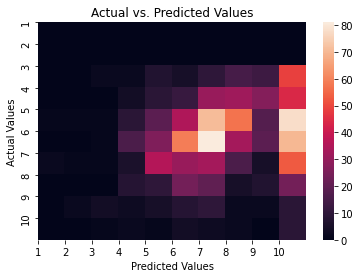

In [104]:
# How well did we do?
rmse, perc_rated, actual_v_pred, preds, acts = fn_validation_comparison(
                                                   df_train=train_data_df, 
                                                   user_matrix=user_mat, 
                                                   movie_matrix=movie_mat,
                                                   val_df=val_df,
                                                   num_pred=0,
                                                   relatory=False,
                                                   verbose=True)
print(rmse, perc_rated)
sns.heatmap(actual_v_pred);
plt.xticks(np.arange(10), np.arange(1,11));
plt.yticks(np.arange(10), np.arange(1,11));
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");
plt.title("Actual vs. Predicted Values");

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(acts, normed=True, alpha=.5, label='actual');
plt.hist(preds, normed=True, alpha=.5, label='predicted');
plt.legend(loc=2, prop={'size': 15});
plt.xlabel('Rating');
plt.title('Predicted vs. Actual Rating');

`2.` We didn't do so bad on making those predictions!  But, how many user-movie pairs were we unable to make predictions for?  Use the cell below to answer this question.

In [ ]:
# From the above, this can be calculated as follows:
print("Number not rated {}".format(int(len(val_df['rating'])*(1-perc_rated))))
print("Number rated {}.".format(int(len(val_df['rating'])*perc_rated)))

### Content Based For New Movies

If all of the above went well, you will notice we still have work to do!  We need to bring in a few things we picked up from the last lesson to use for those new users and movies.  Below is the code used to make the content based recommendations, which found movies that were similar to one another.  This was from **5_Content_Based_Recommendations** in the previous lesson.

The below function **find_similar_movies** will provide similar movies to any movie based only on content.  

Run the cell below to gain access to the content based similarity functions.

In [ ]:
# Subset so movie_content is only using the dummy variables for each genre and the 3 century based year dummy columns
movie_content = np.array(movies.iloc[:,4:])

# Take the dot product to obtain a movie x movie matrix of similarities
dot_prod_movies = movie_content.dot(np.transpose(movie_content))

In [ ]:
#########1#########2#########3#########4#########5#########6#########7#########8
def fn_find_similar_movie(movie_id,
                          verbose=False):
    '''This function...
    
    Source: Udacity Data Science Course - Lesson 7  - Matrix Factorization for
    Recommendations - Forth Notebook - Class 20 - Cold Start Problem w/ FunkSVD
    
    Inputs:
      - movie_id (mandatory) - a movie_id
      - verbose (optional) - if you want some verbosity in your function -
        (Boolean, default=False)
    Output:
      - similar_movie - an array of the most similar movies by title
    '''
    if verbose:
        print('###function movies watched started')
    begin = time()

    # find the row of each movie id
    movie_idx = np.where(movies['movie_id'] == movie_id)[0][0]
    
    # find the most similar movie indices - to start I said they need to be the same for all content
    similar_idxs = np.where(dot_prod_movies[movie_idx] == np.max(dot_prod_movies[movie_idx]))[0]
    
    # pull the movie titles based on the indices
    similar_movies = np.array(movies.iloc[similar_idxs, ]['movie'])
    
    if verbose:
        print('elapsed time: {}s'.format(end-begin))
    
    return similar_movies

In [ ]:
#########1#########2#########3#########4#########5#########6#########7#########8
def fn_get_movie_name(movie_id,
                       verbose=False):
    '''This function...
    
    Source: Udacity Data Science Course - Lesson 7  - Matrix Factorization for
    Recommendations - Forth Notebook - Class 20 - Cold Start Problem w/ FunkSVD
    
    Inputs:
      - movie_id (mandatory) - a list of movie ids
      - verbose (optional) - if you want some verbosity in your function -
        (Boolean, default=False)
    Output:
      - movies - a list of movie names associated with the movie_ids
    '''
    if verbose:
        print('###function get movies names started')
    begin = time()

    movie_lst = list(movies[movies['movie_id'].isin(movie_ids)]['movie'])
    
    if verbose:
        print('elapsed time: {}s'.format(end-begin))
   
    return movie_lst

### Rank Based For New Users

From the above two code cells, we have a way to make recommendations for movie-user pairs that have ratings in any part of our user-movie matrix.  We also have a way to make ratings for movies that have never received a rating using movie similarities.

In this last part here, we need a way to make recommendations to new users.  For this, our functions from **2_Most_Popular_Recommendations** in Lesson 1 will come in handy.  Run the cell below to have these functions available.

Run the cell below to gain access to the rank based functions.

In [ ]:
#########1#########2#########3#########4#########5#########6#########7#########8
def fn_create_ranked_df(movie,
                        review,
                        verbose=False):
    '''This function...
    
    Source: Udacity Data Science Course - Lesson 7  - Matrix Factorization for
    Recommendations - Forth Notebook - Class 20 - Cold Start Problem w/ FunkSVD
    
    Inputs:
      - movie (mandatory) - the movies dataframe
      - review (mandatory) - the reviews dataframe
      - verbose (optional) - if you want some verbosity in your function -
        (Boolean, default=False)
    Output:
    ranked_movies - a dataframe with movies that are sorted by highest avg rating, more reviews, 
                    then time, and must have more than 4 ratings
    '''
    if verbose:
        print('###function movies watched started')
    begin = time()

    # Pull the average ratings and number of ratings for each movie
    movie_ratings = reviews.groupby('movie_id')['rating']
    avg_ratings = movie_ratings.mean()
    num_ratings = movie_ratings.count()
    last_rating = pd.DataFrame(reviews.groupby('movie_id').max()['date'])
    last_rating.columns = ['last_rating']

    # Add Dates
    rating_count_df = pd.DataFrame({'avg_rating': avg_ratings, 'num_ratings': num_ratings})
    rating_count_df = rating_count_df.join(last_rating)

    # merge with the movies dataset
    movie_recs = movies.set_index('movie_id').join(rating_count_df)

    # sort by top avg rating and number of ratings
    ranked_movies = movie_recs.sort_values(['avg_rating', 'num_ratings', 'last_rating'], ascending=False)

    # for edge cases - subset the movie list to those with only 5 or more reviews
    ranked_movies = ranked_movies[ranked_movies['num_ratings'] > 4]
        
    if verbose:
        print('elapsed time: {}s'.format(end-begin))
            
    return ranked_movies

In [ ]:
#########1#########2#########3#########4#########5#########6#########7#########8
def fn_popular_recommendation(user_id, 
                              num_top, 
                              ranked_movie,
                              verbose=False):
    '''This function...
    
    Source: Udacity Data Science Course - Lesson 7  - Matrix Factorization for
    Recommendations - Forth Notebook - Class 20 - Cold Start Problem w/ FunkSVD
    
    Inputs:
      - user_id (mandatory) - the user_id (str) of the individual you are 
        making recommendations for
      - num_top (mandatory) - an integer of the number recommendations you want 
        back
      - ranked_movie (mandatory) - a pandas dataframe of the already ranked 
        movies based on avg rating, count, and time
      - verbose (optional) - if you want some verbosity in your function -
        (Boolean, default=False)
    Output:
      - top_movie - a list of the n top recommended movies by movie title in order 
        best to worst
    '''
    if verbose:
        print('###function popular recommendations started')
    begin = time()

    top_movie = list(ranked_movie['movie'][:n_top])
    
    if verbose:
        print('elapsed time: {}s'.format(end-begin))

    return top_movie

### Now For Your Task

The above cells set up everything we need to use to make predictions.  Your task is to write a function, which uses the above information as necessary to provide recommendations for every user in the **val_df** dataframe.  There isn't one right way to do this, but using a blend between the three could be your best bet.  

You can see the blended approach I used in the video on the next page, but feel free to be creative with your solution!

`3.` Use the function below along with the document strings to assist with completing the task for this notebook.  

In [ ]:
#########1#########2#########3#########4#########5#########6#########7#########8
def fn_make_recommendations(_id, 
                            _id_type='movie', 
                            train_data=train_data_df, 
                            train_df=train_df, 
                            movies=movies, 
                            rec_num=5, 
                            user_mat=user_mat,
                            verbose=False):
    '''This function...
    
    Source: Udacity Data Science Course - Lesson 7  - Matrix Factorization for
    Recommendations - Forth Notebook - Class 20 - Cold Start Problem w/ FunkSVD
    
    Inputs:
      - _id (mandatory) - either a user or movie id (int)
      - _id_type (mandatory) - "movie" or "user" (str)
      - train_data (mandatory)  - dataframe of data as user-movie matrix
      - train_df (mandatory) - dataframe of training data reviews
      - movies (mandatory) - movies df
      - rec_num (optional) - number of recommendations to return (int)
      - user_mat (optional) - the U matrix of matrix factorization
      - movie_mat (optional) - the V matrix of matrix factorization
      - verbose (optional) - if you want some verbosity in your function -
        (Boolean, default=False)
    Output:
      - recs - (array) a list or numpy array of recommended movies like the 
        given movie, or recs for a user_id given
    '''
    if verbose:
        print('###function movies watched started')
    begin = time()

    # if the user is available from the matrix factorization data, 
    # I will use this and rank movies based on the predicted values
    # For use with user indexing
    val_user = train_data_df.index
    rec_id = fn_create_ranked_df(movie, 
                                 train_df,
                                 verbose=verbose)
    
    if _id_type == 'user':
        if _id in train_data.index:
            # Get the index of which row the user is in for use in U matrix
            idx = np.where(val_user == _id)[0][0]
            
            # take the dot product of that row and the V matrix
            pred = np.dot(user_mat[idx,:],movie_mat)
            
            # pull the top movies according to the prediction
            indice = preds.argsort()[-rec_num:][::-1] #indices
            rec_id = train_data_df.columns[indices]
            rec_name = fn_get_movie_name(rec_id,
                                         verbose=verbose)         
        else:
            # if we don't have this user, give just top ratings back
            rec_names = fn_popular_recommendation(_id, 
                                                  rec_num, 
                                                  ranked_movie,
                                                  verbose=verbose)
            
    # Find similar movies if it is a movie that is passed
    else:
        rec_id = fn_find_similar_movie(_id,
                                       verbose=verbose)
        rec_name = get_movie_name(rec_id,
                                  verbose=verbose)
        
    output = rec_id, rec_name
    
    end = time()
    
    if verbose:
        print('elapsed time: {}s'.format(end-begin))
    
    return output

In [ ]:
fn_make_recommendation(_id=48, 
                       _id_type='user'
                       verbose=True)

In [ ]:
len(set(val_df['user_id']))

In [ ]:
# Make recommendations
user_rec_dict_with_top = dict()
for user_id in set(val_df['user_id']):
    user_rec_dict_with_top[user_id] = fn_make_recommendation(_id=user_id, 
                                                             _id_type='user')[1]

In [ ]:
cnter = 0
for user, rec in user_rec_dict_with_top.items():
    if cnter < 12:
        print("For user {}, our recommendations are: \n {}".format(user, rec))
        cnter+=1
    else:
        break

**This recommendation style looks like it may do okay with accuracy, but it seems like a lot of the same movies are showing up.  When we think back to serendipity, novelty, and diversity as means of a good recommendation system, this set of recommendations still isn't great.  We might consider providing some content based recommendations from movies an individual has watched along with these recommendations to meet those categories of a good recommender.**